First 5 rows of the dataset:
        Date        Open        High         Low       Close   Adj Close  \
0 2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1 2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2 2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3 2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4 2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


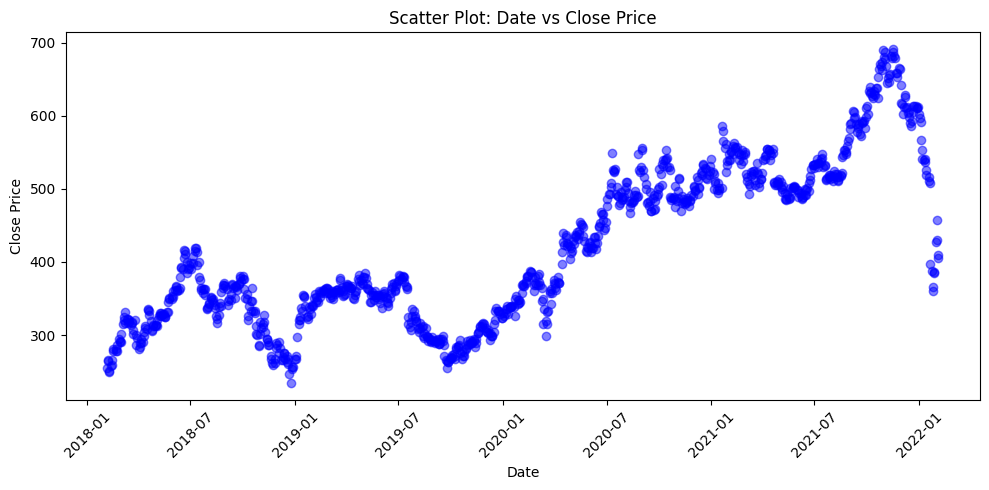

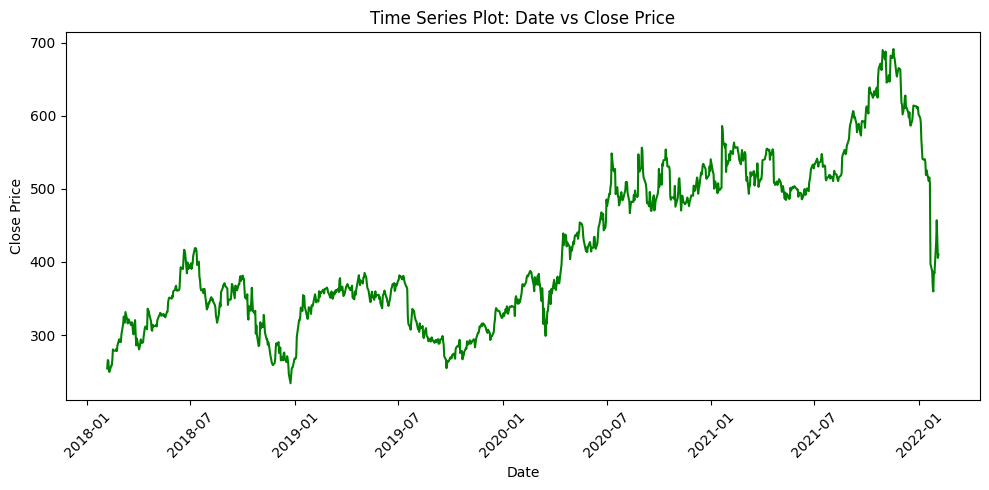

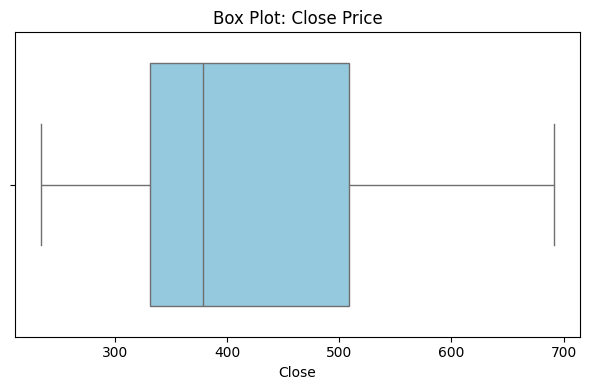

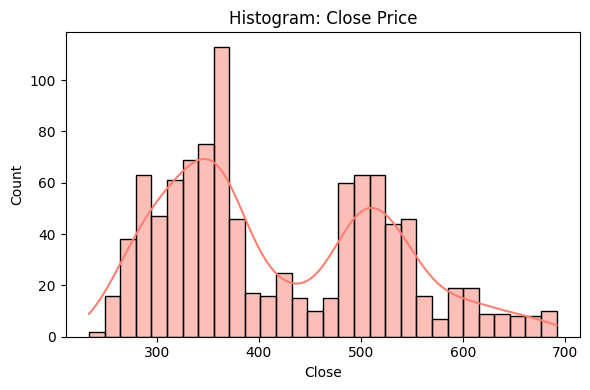


Dataset shape before outlier removal: (1009, 7)
Dataset shape after outlier removal: (952, 7)

Model Performance (R² Score):
Linear Regression R²: 0.9986772307396794
Random Forest Regressor R²: 0.9977028921011646
SVR R²: 0.7997662985738392


<ipython-input-12-5869a2fc9294>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette="coolwarm")


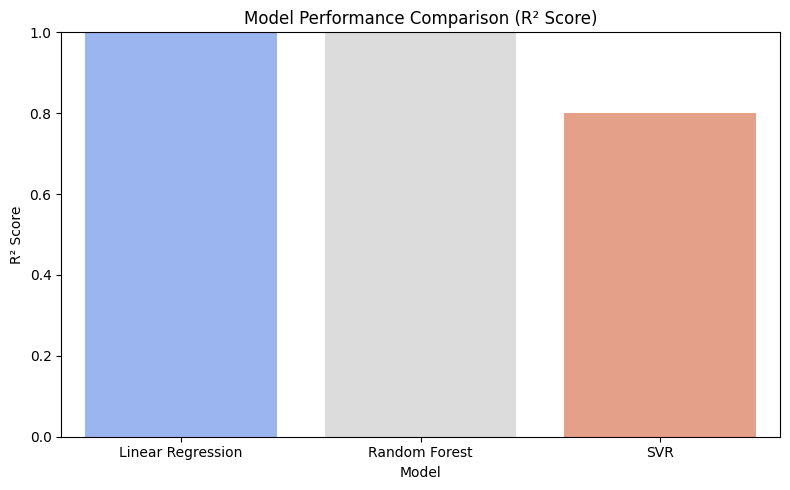


Statistical Analysis (Skewness & Kurtosis):


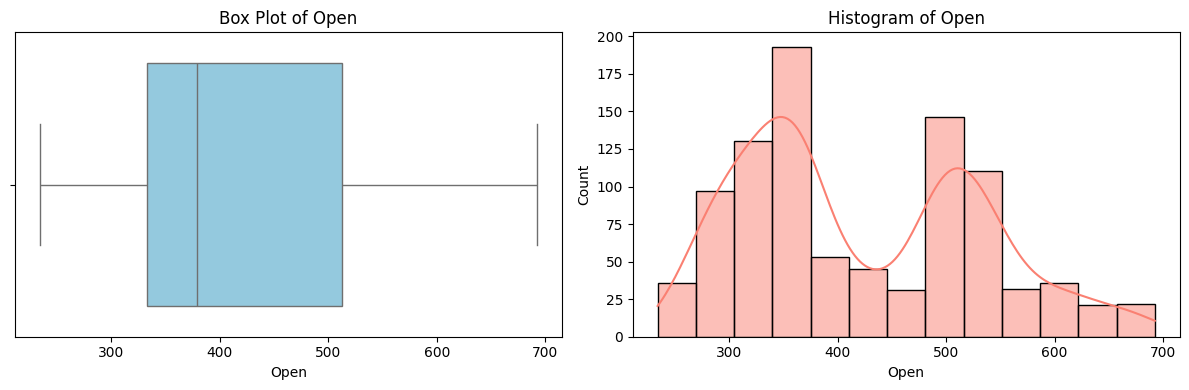

Open: Skewness = 0.42, Kurtosis = -0.90


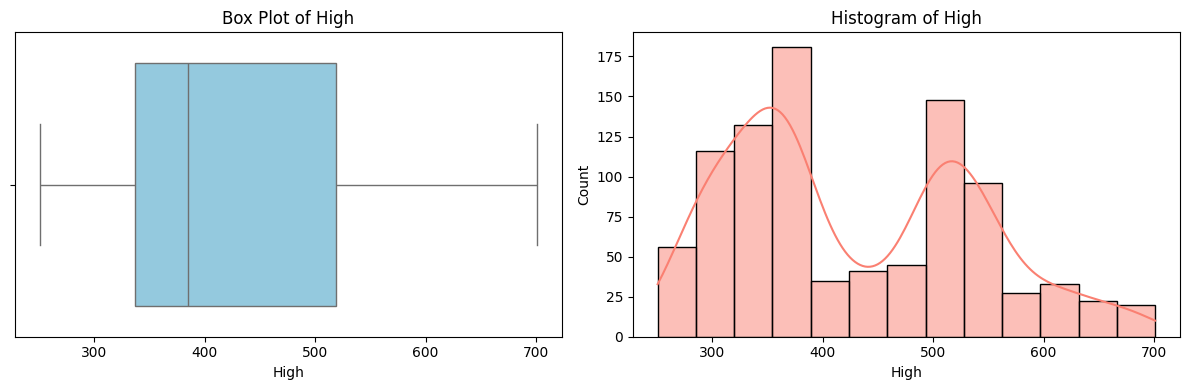

High: Skewness = 0.42, Kurtosis = -0.91


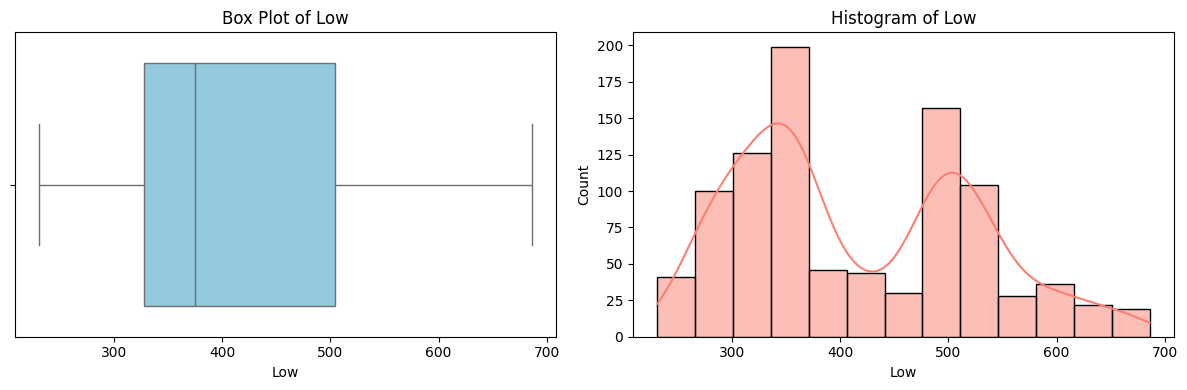

Low: Skewness = 0.42, Kurtosis = -0.90


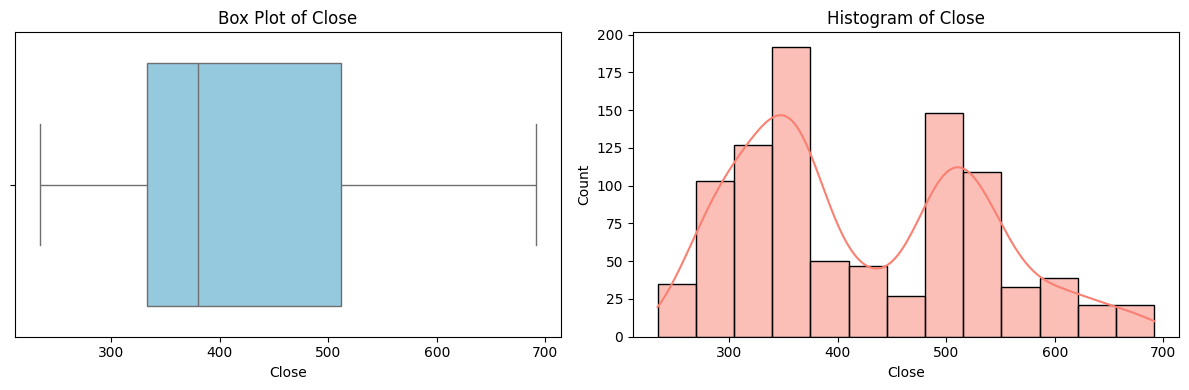

Close: Skewness = 0.42, Kurtosis = -0.91


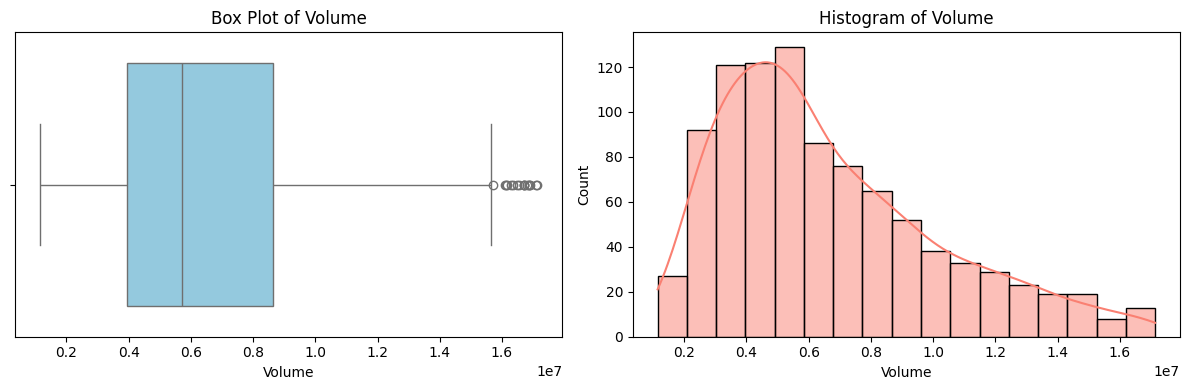

Volume: Skewness = 0.92, Kurtosis = 0.20

T-Test: t-statistic = 0.0086, p-value = 0.9932
Z-Test: z-statistic = 2.4854, p-value = 0.0129
ANOVA: F-statistic = 2.0593, p-value = 0.1035


In [12]:
# --------------------------
# 0. Import Libraries
# --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

from scipy import stats
from statsmodels.stats.weightstats import ztest

# --------------------------
# 1. Load and Preprocess Data
# --------------------------
df = pd.read_csv("/content/NFLX.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna()
df = df.sort_values('Date')

print("First 5 rows of the dataset:")
print(df.head())

# --------------------------
# 2. Data Visualization
# --------------------------

# Scatter Plot: Date vs Close
plt.figure(figsize=(10, 5))
plt.scatter(df['Date'], df['Close'], alpha=0.5, color='blue')
plt.title("Scatter Plot: Date vs Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time Series Plot: Date vs Close (line plot)
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], color='green')
plt.title("Time Series Plot: Date vs Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box Plot for Close Price
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Close'], color='skyblue')
plt.title("Box Plot: Close Price")
plt.tight_layout()
plt.show()

# Histogram for Close Price
plt.figure(figsize=(6, 4))
sns.histplot(df['Close'], kde=True, bins=30, color='salmon')
plt.title("Histogram: Close Price")
plt.tight_layout()
plt.show()

# --------------------------
# 3. Remove Outliers (IQR Method)
# --------------------------
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]
print("\nDataset shape before outlier removal:", df.shape)
print("Dataset shape after outlier removal:", df_clean.shape)

# --------------------------
# 4. Model Training After Outlier Removal
# --------------------------
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

# Support Vector Regressor (with scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
r2_svr = r2_score(y_test, y_pred_svr)

# --------------------------
# 5. Model Performance Plot
# --------------------------
print("\nModel Performance (R² Score):")
print("Linear Regression R²:", r2_lr)
print("Random Forest Regressor R²:", r2_rf)
print("SVR R²:", r2_svr)

model_names = ['Linear Regression', 'Random Forest', 'SVR']
r2_scores = [r2_lr, r2_rf, r2_svr]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=r2_scores, palette="coolwarm")
plt.ylim(0, 1)
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# --------------------------
# 6. Statistical Analysis (Skewness & Kurtosis)
# --------------------------
print("\nStatistical Analysis (Skewness & Kurtosis):")
for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_clean[col], color='skyblue')
    plt.title(f"Box Plot of {col}")

    # Histogram with KDE
    plt.subplot(1, 2, 2)
    sns.histplot(df_clean[col], kde=True, color='salmon')
    plt.title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()

    # Compute and print skewness and kurtosis
    skew_val = df_clean[col].skew()
    kurt_val = df_clean[col].kurtosis()
    print(f"{col}: Skewness = {skew_val:.2f}, Kurtosis = {kurt_val:.2f}")
# --------------------------
# 7. Statistical Tests
# --------------------------

# T-Test: Open vs Close
t_stat, p_val_t = stats.ttest_ind(df_clean["Open"], df_clean["Close"], equal_var=False)
print(f"\nT-Test: t-statistic = {t_stat:.4f}, p-value = {p_val_t:.4f}")

# Z-Test: High vs Low
z_stat, p_val_z = ztest(df_clean["High"], df_clean["Low"])
print(f"Z-Test: z-statistic = {z_stat:.4f}, p-value = {p_val_z:.4f}")

# ANOVA: Open, High, Low, Close
anova_stat, p_val_anova = stats.f_oneway(df_clean["Open"], df_clean["High"], df_clean["Low"], df_clean["Close"])
print(f"ANOVA: F-statistic = {anova_stat:.4f}, p-value = {p_val_anova:.4f}")
